In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:

#set timer
start=time.perf_counter()

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

stop=time.perf_counter()
print(f'Loop took {stop - start:0.2f} seconds to complete.')


Processing Record 1 of Set 1 | cumpas
Processing Record 2 of Set 1 | vestmanna
Processing Record 3 of Set 1 | camacupa
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | namatanai
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | zhezkazgan
Processing Record 16 of Set 1 | mareeba
Processing Record 17 of Set 1 | aswan
Processing Record 18 of Set 1 | nanakuli
Processing Record 19 of Set 1 | mahina
Processing Record 20 of Set 1 | udachnyy
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | dothan
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of Set 1 | rikitea
Processing Reco

Processing Record 43 of Set 4 | smithers
Processing Record 44 of Set 4 | harer
Processing Record 45 of Set 4 | hue
Processing Record 46 of Set 4 | hovd
Processing Record 47 of Set 4 | fort frances
Processing Record 48 of Set 4 | lakheri
Processing Record 49 of Set 4 | college
Processing Record 50 of Set 4 | ozinki
Processing Record 1 of Set 5 | rapid valley
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | omboue
Processing Record 7 of Set 5 | waitati
Processing Record 8 of Set 5 | marathon
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | kaeo
Processing Record 11 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 5 | eureka
Processing Record 13 of Set 5 | hervey bay
Processing Record 14 of Set 5 | mbigou
Processing Record 15 o

Processing Record 31 of Set 8 | tautira
Processing Record 32 of Set 8 | opole
Processing Record 33 of Set 8 | sabha
Processing Record 34 of Set 8 | raahe
Processing Record 35 of Set 8 | colquechaca
Processing Record 36 of Set 8 | wattegama
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | trairi
Processing Record 39 of Set 8 | molteno
Processing Record 40 of Set 8 | galesburg
Processing Record 41 of Set 8 | nanchang
Processing Record 42 of Set 8 | mandurah
Processing Record 43 of Set 8 | peace river
Processing Record 44 of Set 8 | staryy nadym
Processing Record 45 of Set 8 | orlik
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | san ramon
Processing Record 48 of Set 8 | uruzgan
Processing Record 49 of Set 8 | necochea
Processing Record 50 of Set 8 | utiel
Processing Record 1 of Set 9 | domna
Processing Record 2 of Set 9 | carutapera
Processing Record 3 of Set 9 | presidencia roque saenz pena
Processing Record

Processing Record 21 of Set 12 | bacolod
Processing Record 22 of Set 12 | novovasylivka
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | khonuu
City not found. Skipping...
Processing Record 25 of Set 12 | salina cruz
Processing Record 26 of Set 12 | kano
Processing Record 27 of Set 12 | saint-pierre
Processing Record 28 of Set 12 | arman
Processing Record 29 of Set 12 | port lincoln
Processing Record 30 of Set 12 | gijon
Processing Record 31 of Set 12 | parras
City not found. Skipping...
Processing Record 32 of Set 12 | strezhevoy
Processing Record 33 of Set 12 | scarborough
Processing Record 34 of Set 12 | dunedin
Processing Record 35 of Set 12 | songjianghe
Processing Record 36 of Set 12 | sarangani
Processing Record 37 of Set 12 | kahului
Processing Record 38 of Set 12 | monterey
Processing Record 39 of Set 12 | usinsk
Processing Record 40 of Set 12 | kununurra
Processing Record 41 of Set 12 | nuuk
Processing Record 42 of Set 12 | labutta
City not found. Skipp

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cumpas,29.9833,-109.7833,51.98,34,9,4.76,MX,2022-01-29 16:15:21
1,Vestmanna,62.1564,-7.1664,34.72,64,100,37.98,FO,2022-01-29 16:15:21
2,Camacupa,-12.0167,17.4833,69.57,87,99,3.47,AO,2022-01-29 16:13:54
3,East London,-33.0153,27.9116,72.54,73,20,9.22,ZA,2022-01-29 16:15:21
4,Namatanai,-3.6667,152.4333,79.05,84,96,5.61,PG,2022-01-29 16:15:22
5,Albany,42.6001,-73.9662,13.59,74,100,1.99,US,2022-01-29 16:15:22
6,Leningradskiy,69.3833,178.4167,-3.21,84,84,4.52,RU,2022-01-29 16:15:22
7,Torbay,47.6666,-52.7314,37.27,85,75,20.71,CA,2022-01-29 16:15:22
8,Carnarvon,-24.8667,113.6333,75.27,88,40,11.50,AU,2022-01-29 16:15:23
9,Pacific Grove,36.6177,-121.9166,54.28,56,0,1.01,US,2022-01-29 16:10:28


In [9]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cumpas,MX,2022-01-29 16:15:21,29.9833,-109.7833,51.98,34,9,4.76
1,Vestmanna,FO,2022-01-29 16:15:21,62.1564,-7.1664,34.72,64,100,37.98
2,Camacupa,AO,2022-01-29 16:13:54,-12.0167,17.4833,69.57,87,99,3.47
3,East London,ZA,2022-01-29 16:15:21,-33.0153,27.9116,72.54,73,20,9.22
4,Namatanai,PG,2022-01-29 16:15:22,-3.6667,152.4333,79.05,84,96,5.61
...,...,...,...,...,...,...,...,...,...
554,Hvide Sande,DK,2022-01-29 16:29:02,56.0045,8.1294,48.49,76,80,51.74
555,Santa Cruz De Tenerife,ES,2022-01-29 16:29:02,28.4682,-16.2546,69.22,77,40,8.01
556,Pangnirtung,CA,2022-01-29 16:29:02,66.1451,-65.7125,-16.60,76,100,6.91
557,Taoudenni,ML,2022-01-29 16:27:38,22.6783,-3.9836,80.31,11,100,15.86


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

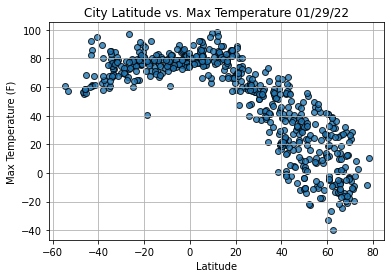

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

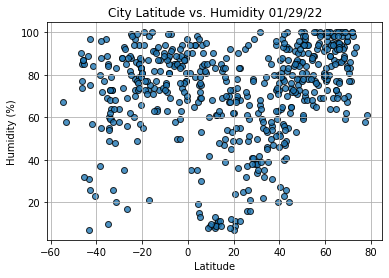

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

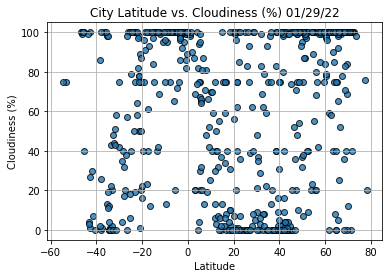

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

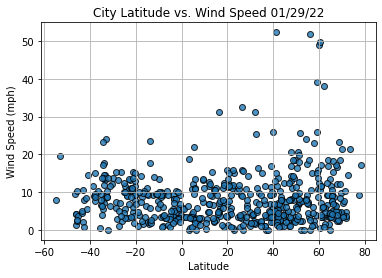

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

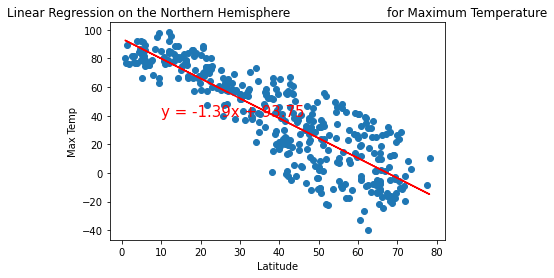

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

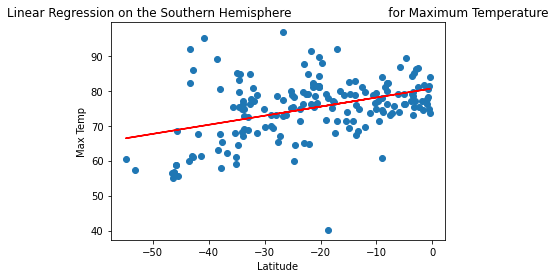

In [19]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

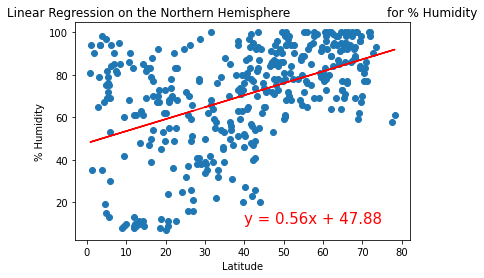

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

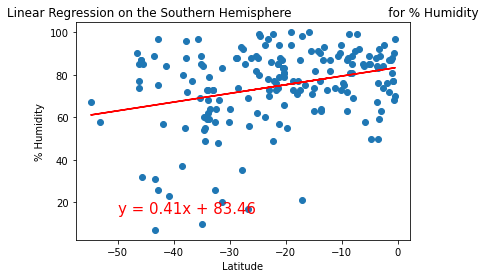

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

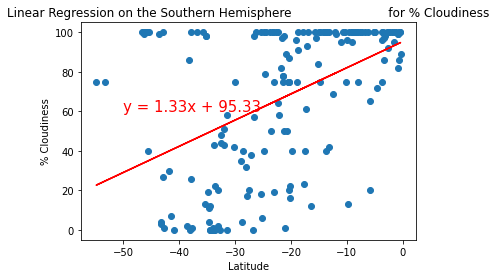

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

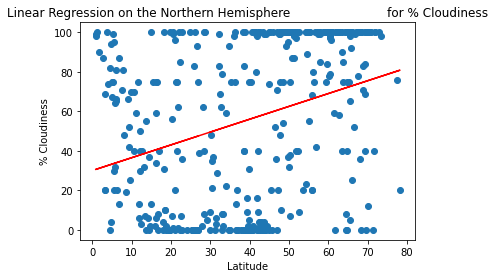

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

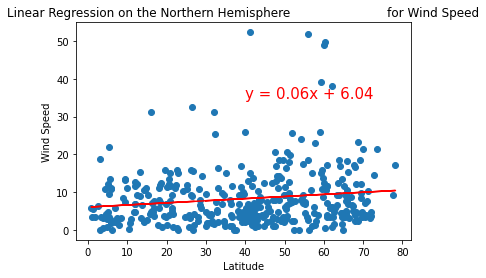

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

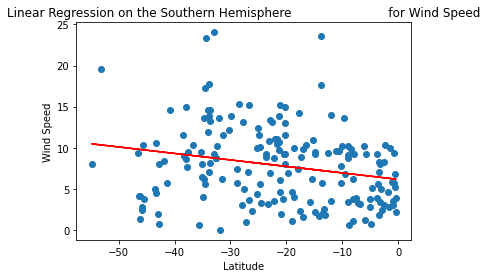

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))